# <font color="Orange">LIBRARY IMPORTS</font>

In [ ]:
#!pip3 install xlrd
#!pip3 install wordcloud
#!pip install matplotlib-venn
#!apt-get -qq install -y libfluidsynth1

## DATA IMPORTS
import pandas as pd
import os
from tqdm.notebook import tqdm
import time
import matplotlib.pyplot as plt


## COMPUTATION
import numpy as np
import math


## FEATURE SELECTION
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2

## CATEGORICAL FEATURE ENCODING
from sklearn.preprocessing import LabelEncoder


## DATA MODELLING AND PREDICTION
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import StandardScaler

## UNSUPERVISED MACHINE LEARNING
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, Birch, DBSCAN


## VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

## SUPPRESS WARNINGS
import warnings
warnings.filterwarnings('ignore')

# <font color="Orange">IMPORT DATA</font>
Import all csv files and combine them using pandas

In [ ]:
## CONCAT ALL FILES INTO ONE DATASET
df = pd.read_csv('USA_Housing.csv')


In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Because the addess field is textual and do not conform to numerical data, we drop it.

In [ ]:
# remove the columns that are not needed  - Address
df.drop(['Address'], axis=1, inplace=True)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
## SET TARGET VARIABLE NAME
target = 'Price'

# <font color="Orange">DESCRIPTIVE DATA ANALYSIS</font>

## <font color="Tomato">DATASET ROW AND COLUMN</font>

In [ ]:
print("{:30s}:{:d}".format("NUMBER OF COLUMNS",df.shape[1]))
print("{:30s}:{:d}".format("NUMBER OF ROWS",df.shape[0]))

NUMBER OF COLUMNS             :6
NUMBER OF ROWS                :5000


## <font color="Tomato">DATASET STATISTICS</font>
Here we do an EDA of DATA on every City.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,4865.0,6.861479e+04,10306.034672,40141.566477,6.159089e+04,6.884476e+04,7.572044e+04,9.711236e+04
Avg. Area House Age,4865.0,5.976092e+00,0.965841,3.342599,5.330604e+00,5.969854e+00,6.640916e+00,8.641821e+00
Area Population,4865.0,3.611832e+04,9636.818930,9487.921585,2.943645e+04,3.614783e+04,4.276837e+04,6.296376e+04
Avg. Area Number of Rooms,4865.0,6.986630e+00,0.984786,4.290194,6.304586e+00,7.002164e+00,7.661429e+00,9.715723e+00
Avg. Area Number of Bedrooms,4865.0,3.983829e+00,1.235180,2.000000,3.150000e+00,4.050000e+00,4.490000e+00,6.500000e+00
Price,4865.0,1.231538e+06,338842.615548,287307.583689,1.002691e+06,1.232209e+06,1.465120e+06,2.180066e+06


## <font color="Tomato">DESCRIPTIVE DATA SUMMARY OF TARGET VARIABLE </font>

In [ ]:
df[target].describe()

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

Mean is very higher than zero. The target variable is thus not biased.

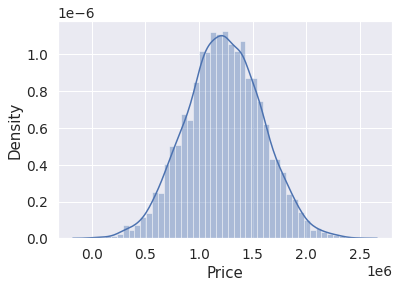

In [ ]:
#histogram
sns.distplot(df[target])
plt.show()

### Skewness 
If the values of a specific independent variable (feature) are skewed, depending on the model, skewness may violate model assumptions or may reduce the interpretation of feature importance. In statistics, skewness is a degree of asymmetry observed in a probability distribution that deviates from the symmetrical normal distribution (bell curve) in a given set of data.

In statistics, a positively skewed distribution is a sort of distribution where, unlike symmetrically distributed data where all measures of the central tendency (mean, median, and mode) equal each other, with positively skewed data, the measures are dispersing, which means Positively Skewed Distribution is a type of distribution where the mean, median, and mode of the distribution are positive rather than negative or zero.

### Kurtosis
Kurtosis refers to the degree of presence of outliers in the distribution.
Kurtosis is a statistical measure, whether the data is heavy-tailed or light-tailed in a normal distribution.

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df[target].skew())
print("Kurtosis: %f" % df[target].kurt())

Skewness: -0.019770
Kurtosis: -0.290791


- Deviate from the normal distribution.
- Have appreciable positive skewness.
- Show peakedness.

# <font color="Orange">DATA PREPROCESSING</font>

## DATA CLEANSING

- DROP MISSING VALUE
- IMPUTE INCONSISTENT VALUES
- TEXT PROCESSING 
- CATEGORICAL VARIABLES LABEL ENCODING

## <font color="Tomato">DROPPING MISSING VALUES </font>
This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10, 000 values this is a small number and this is negligible so I just dropped those values.

In [ ]:
## NULLCOLOUMNS
Nullcolumns = pd.DataFrame(df.dtypes, columns=['dtypes'])
Nullcolumns = Nullcolumns.reset_index()
Nullcolumns['Column'] = Nullcolumns['index']
Nullcolumns = Nullcolumns[['Column']]
Nullcolumns['Missing'] = df.isnull().sum().values 
Nullcolumns['Missing percentage'] = df.isnull().sum().values / df.shape[0]*100 

print("{:25s}{:20s}{:20s}{:20s}".format(" COLUMN NAME"," DATA TYPE","MISSING VALUES","MISSING PERCENTAGE"))
print("_______________________________________________________________________________________")
for x,y,z in zip(df.columns,df.dtypes,df.isnull().sum()): # column names 
    print("\033[1;32;40m {:25s}:\033[1;37;40m{:20s}\033[1;37;40m{:20s}\033[1;37;40m{:20s}".format(x,str(y),str(z),str(z/df.shape[0]*100)))

 COLUMN NAME              DATA TYPE          MISSING VALUES      MISSING PERCENTAGE  
_______________________________________________________________________________________
 Avg. Area Income         :float64             0                   0.0                 
 Avg. Area House Age      :float64             0                   0.0                 
 Avg. Area Number of Rooms:float64             0                   0.0                 
 Avg. Area Number of Bedrooms:float64             0                   0.0                 
 Area Population          :float64             0                   0.0                 
 Price                    :float64             0                   0.0                 


In [ ]:
#Checking Number of columns based on NULL percentage
for i in [1, 10, 25, 50, 70, 75,80, 90, 95,99]:
    print("\033[1;37;40m{:2s} % of NULL values account for \033[0;30;47m {:6s} % \033[1;37;40m of all FEATURES: NUMBER OF COLUMNS : \033[0;37;41m {:5s}".format(str(i),"%03.2f"%((Nullcolumns[Nullcolumns['Missing percentage'] > i ].Column.count()
                                /df.shape[1])*100),str(Nullcolumns[Nullcolumns['Missing percentage'] > i ].Column.count())))

1  % of NULL values account for  0.00   %  of all FEATURES: NUMBER OF COLUMNS :  0    
10 % of NULL values account for  0.00   %  of all FEATURES: NUMBER OF COLUMNS :  0    
25 % of NULL values account for  0.00   %  of all FEATURES: NUMBER OF COLUMNS :  0    
50 % of NULL values account for  0.00   %  of all FEATURES: NUMBER OF COLUMNS :  0    
70 % of NULL values account for  0.00   %  of all FEATURES: NUMBER OF COLUMNS :  0    
75 % of NULL values account for  0.00   %  of all FEATURES: NUMBER OF COLUMNS :  0    
80 % of NULL values account for  0.00   %  of all FEATURES: NUMBER OF COLUMNS :  0    
90 % of NULL values account for  0.00   %  of all FEATURES: NUMBER OF COLUMNS :  0    
95 % of NULL values account for  0.00   %  of all FEATURES: NUMBER OF COLUMNS :  0    
99 % of NULL values account for  0.00   %  of all FEATURES: NUMBER OF COLUMNS :  0    


In [ ]:
df = df.dropna()    ## DROP MISSING DATA
df.count()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms    5000
Area Population                 5000
Price                           5000
dtype: int64

In [ ]:
print("{:60s}:{:d}".format("NUMBER OF COLUMNS AFTER MISSING VALUE IMPUTATION",df.shape[1]))
print("{:60s}:{:d}".format("NUMBER OF ROWS AFTER MISSING VALUE IMPUTATION",df.shape[0]))

NUMBER OF COLUMNS AFTER MISSING VALUE IMPUTATION            :6
NUMBER OF ROWS AFTER MISSING VALUE IMPUTATION               :5000


## <font color="Tomato">DROP DUPLICATE ROWS </font>
This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 10925 data meaning that I had 989 of duplicate data.

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("{:60s}:{:d}".format("NUMBER OF ROWS BEFORE DUPLICATE ROW IMPUTATION",df.shape[0]))
## DROP DUPLICATES
df = df.drop_duplicates()
print("{:60s}:{:d}".format("NUMBER OF ROWS AFTER DUPLICATE ROW IMPUTATION",df.shape[0]))

NUMBER OF ROWS BEFORE DUPLICATE ROW IMPUTATION              :5000
NUMBER OF ROWS AFTER DUPLICATE ROW IMPUTATION               :5000


## <font color="Tomato">DETECT OUTLIERS AND STRIP OUTLIER ROWS </font>
An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. 

The IQR describes the middle 50% of values when ordered from lowest to highest. To find the interquartile range (IQR), ​first find the median (middle value) of the lower and upper half of the data. These values are quartile 1 (Q1) and quartile 3 (Q3). The IQR is the difference between Q3 and Q1.  
The interquartile range is a measure of where the “middle fifty” is in a data set. Where a range is a measure of where the beginning and end are in a set, an interquartile range is a measure of where the bulk of the values lie. That’s why it’s preferred over many other measures of spread when reporting things like school performance or SAT scores.

The interquartile range formula is the first quartile subtracted from the third quartile.

$
\begin{equation}
IQR = Q_3 - Q_1
\end{equation}
$



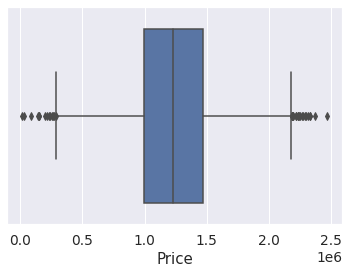

In [ ]:
sns.boxplot(x=df[target])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Avg. Area Income                 14302.776278
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.366621
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362067
Price                           473633.069163
dtype: float64


In [ ]:
## REMOVE OUTLIERS
print("{:60s}:{:d}".format("NUMBER OF ROWS BEFORE OUTLIER ROW IMPUTATION",df.shape[0]))
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
## DROP DUPLICATES
df = df.drop_duplicates()
print("{:60s}:{:d}".format("NUMBER OF ROWS AFTER OUTLIER ROW IMPUTATION",df.shape[0]))

NUMBER OF ROWS BEFORE OUTLIER ROW IMPUTATION                :5000
NUMBER OF ROWS AFTER OUTLIER ROW IMPUTATION                 :4865


## <font color="Tomato">GET NUMERICAL DATA</font>


In [ ]:
numeric_data=df.select_dtypes(exclude='object').drop(['Price'],axis=1).copy()
numerical_feautures = numeric_data.keys() ## CAT FEAT LIST
numeric_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [ ]:
### CREATE A COPY OF DF
df2 = df.copy()

## <font color="Tomato">HISTOGRAM AND KDE OF ALL NUMERIC VARIABLES </font>

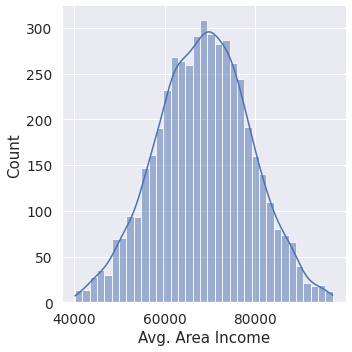

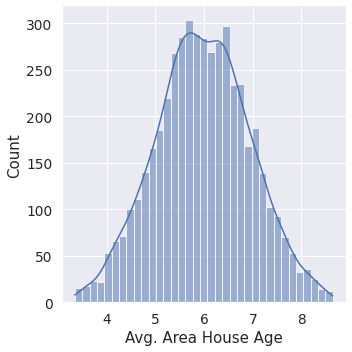

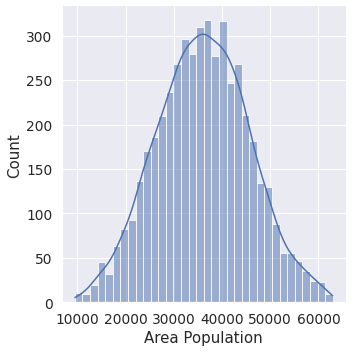

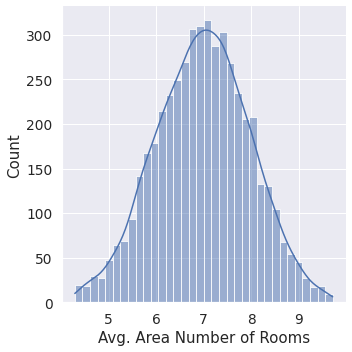

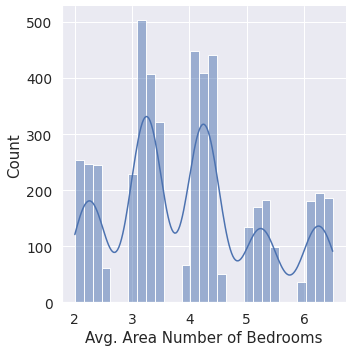

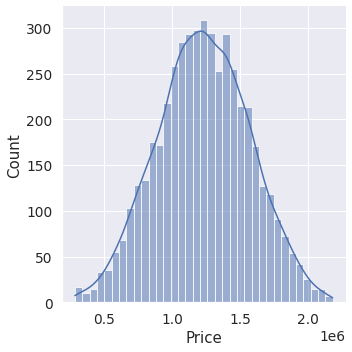

In [ ]:
for cols in df.columns:
  sns.displot(df[cols], kde=True)
  plt.show()

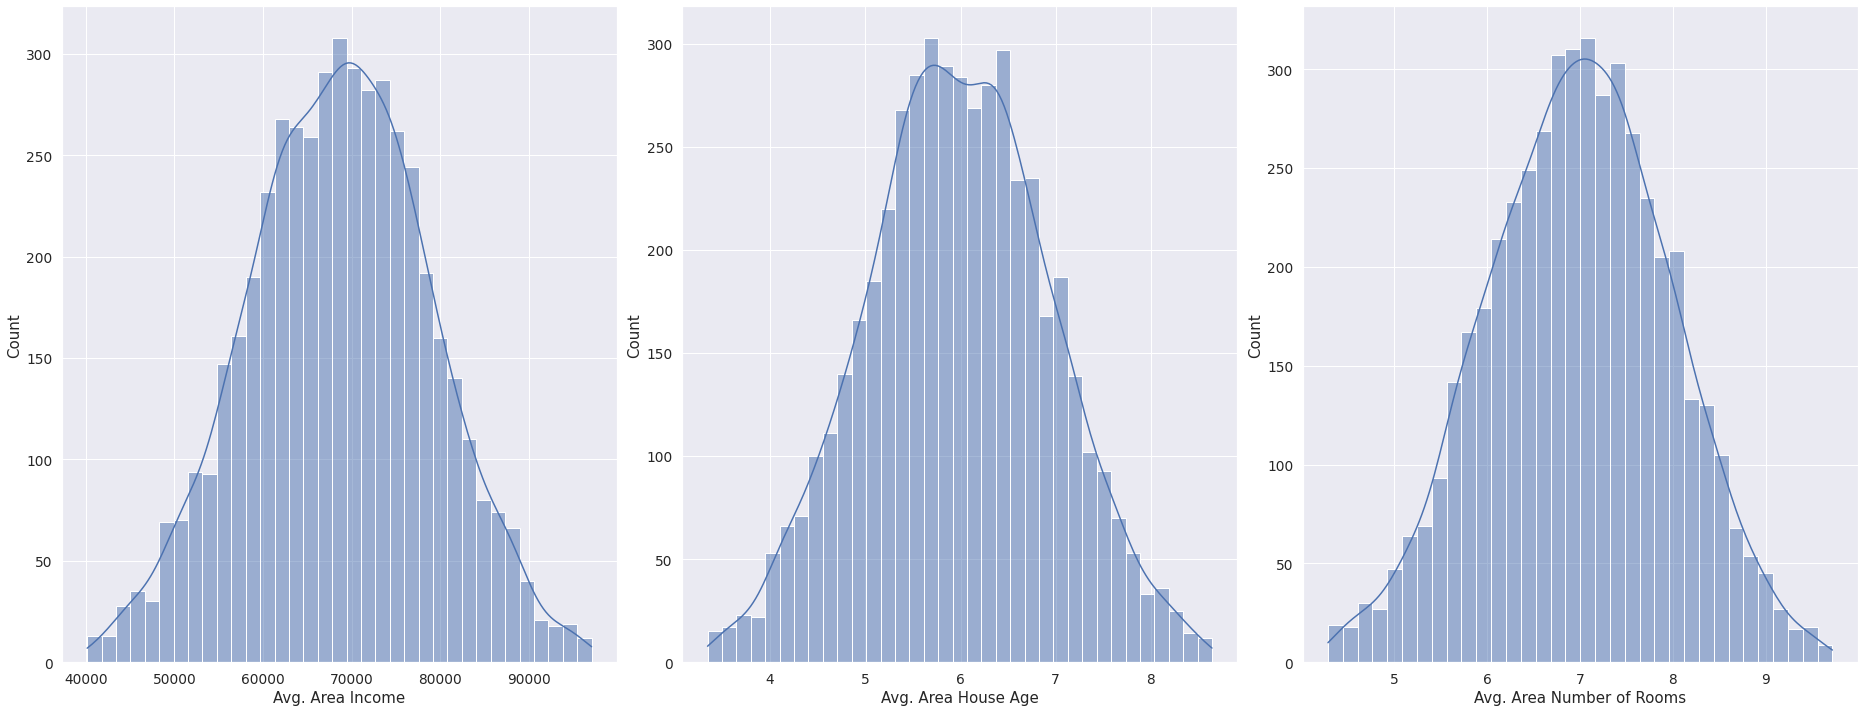

In [ ]:
cols = 3
rows = int(len(numeric_data.columns)/cols)
if rows ==0: rows =1

fig, axes = plt.subplots(nrows=rows, ncols=cols,figsize=(26,10))

for i, ax in enumerate(axes.flatten()):
    ax = sns.histplot(ax=ax,data=numeric_data, x=numeric_data[numeric_data.columns[i]], kde=True)
    # ax.tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()

# <font color="Orange">FEATURE SELECTION</font>
Now we'll try to find which features are strongly correlated with Targrt variable. Feature selection or variable selection is the process of selecting a subset of relevant features or variables from the total features of a level in a data set to build machine learning algorithms.

## Get and Remove Constant Features from Dataset : FEATURES WITH STANDARD DEVIATION = 0

In [ ]:
constant_features = [feat for feat in df.columns if df[feat].std() == 0]
print("CONSTANT FEATURES")
print(constant_features)
df = df.drop(labels=constant_features, axis=1)

CONSTANT FEATURES
[]


## Remove Quasi-Constant Features from Dataset

In [ ]:
# Remove quasi-constant features
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately
sel.fit(df)  # fit finds the features with low variance
sum(sel.get_support()) # how many not quasi-constant?

6

In [ ]:
# Get the remaining features
features_to_keep = df.columns[sel.get_support()]
print("KEEPING FEATURES")
print(features_to_keep)

KEEPING FEATURES
Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')


In [ ]:
## REMOVE QUASI CONSTANT FEATURES
df= df[features_to_keep]
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


## CORELATION ANALYSIS

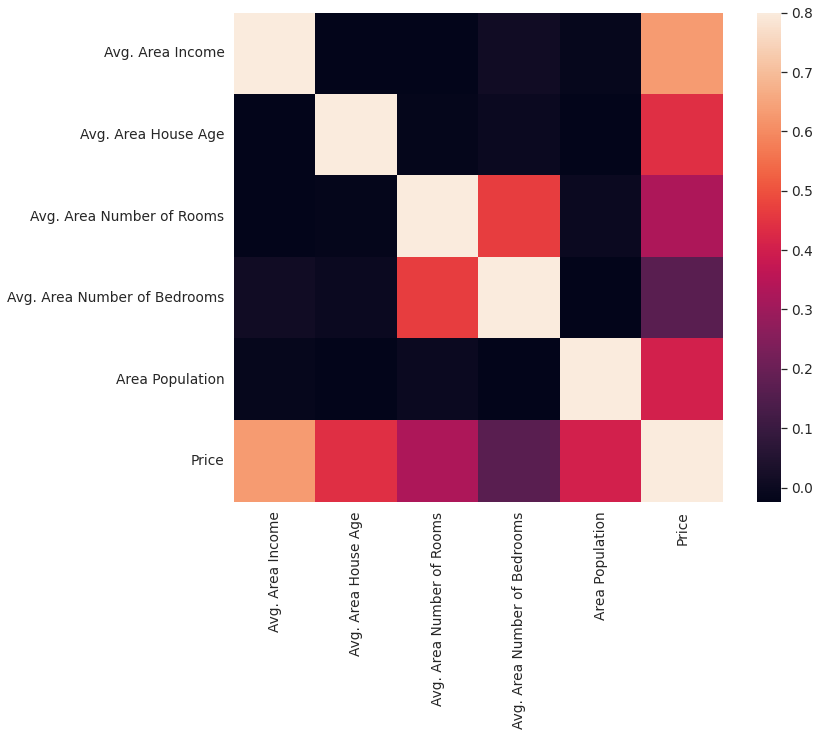

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

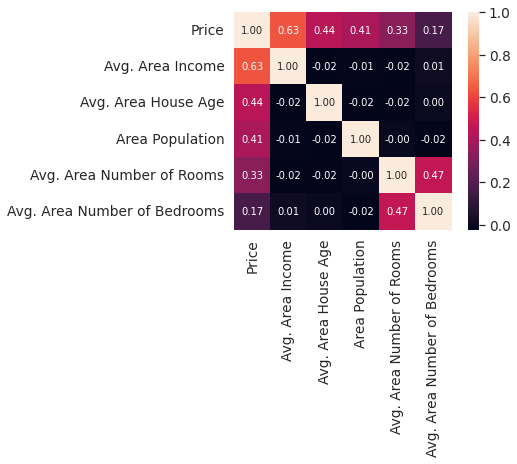

In [ ]:
#zoomed correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, target)[target].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
df_corr = pd.DataFrame()
# Find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
 
corr_features = correlation(df, 0.7)
print("CORELATED FEATURES")
print(corr_features)

CORELATED FEATURES
set()


## <font color="Tomato">REMOVE CORELATED FEATURES</font>

Remove all corelated features except the one with the highest corelation to the target variable.

In [ ]:
eff_list = list(corr_features)
eff_list.append(target)
ineffective_features  = df[eff_list].corr()[target].sort_values(ascending=False).keys()[2:]
print("INEFFECTIVE FEATURES")
print("***************************************")
print("\033[0;30;47m" + ",".join(list(ineffective_features.values)))

INEFFECTIVE FEATURES
***************************************



In [ ]:
## REMOVE CORELATED FEATURES
df = df.drop(list(ineffective_features.values),axis=1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


## <font color="Tomato">GET FEATURES WITH HIGH CORELATION TO TARGET FEATURE</font>

In [ ]:
threshold = 0.1 ## THRESHOLD
num_feat = int(0.8*len(df)) ## NUMBER OF FEATURES TO KEEP : 80 %

In [ ]:
X = df[[col for col in df.columns if col!=target]]   ### DATA
y = df[target]                                         ### TARGET

In [ ]:
df_corr = df.corr()[target]

print("The Corelation of Features With Respect to target are :")
print("***************************************")
print(df_corr)
corelation_features_list = df_corr[abs(df_corr) > threshold].sort_values(ascending=False)[1:num_feat]
print()
print("***************************************")
print("There is {} strongly correlated values with Target Feature:\n{}".format(len(corelation_features_list), corelation_features_list))

The Corelation of Features With Respect to target are :
***************************************
Avg. Area Income                0.632031
Avg. Area House Age             0.441675
Avg. Area Number of Rooms       0.329630
Avg. Area Number of Bedrooms    0.168606
Area Population                 0.406027
Price                           1.000000
Name: Price, dtype: float64

***************************************
There is 5 strongly correlated values with Target Feature:
Avg. Area Income                0.632031
Avg. Area House Age             0.441675
Area Population                 0.406027
Avg. Area Number of Rooms       0.329630
Avg. Area Number of Bedrooms    0.168606
Name: Price, dtype: float64


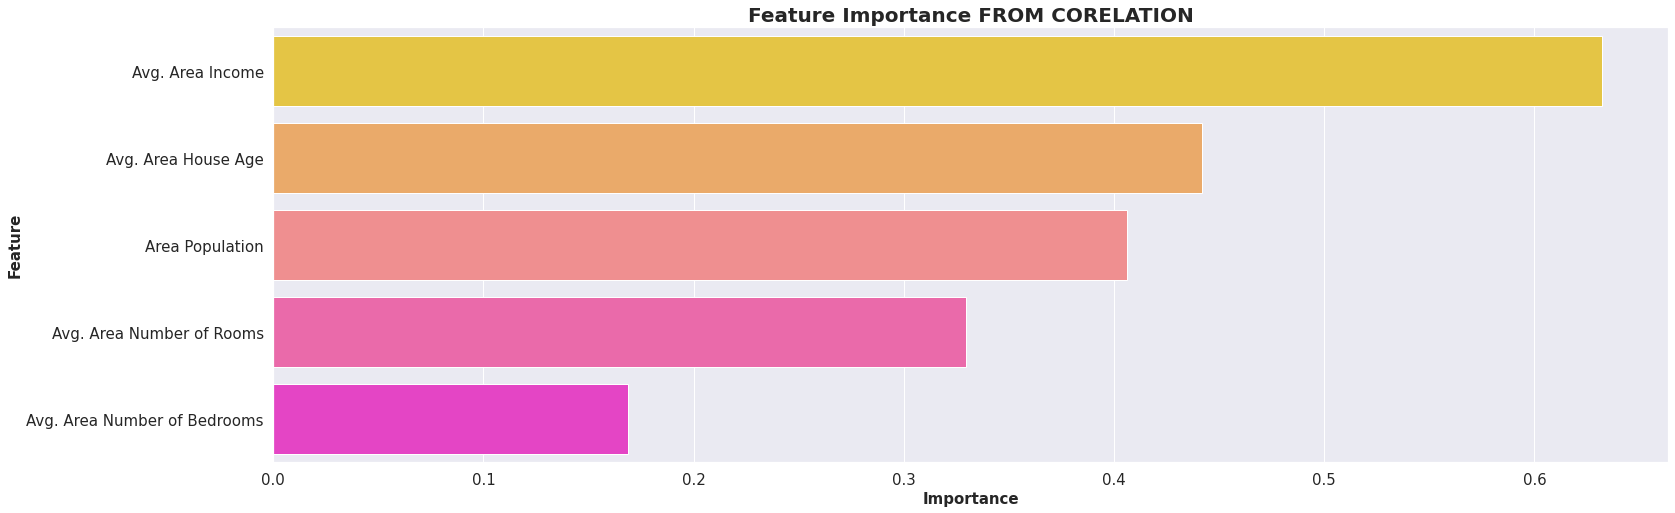

In [ ]:
## CREATE THE IMPORTANCE DATAFRAME
from matplotlib.pyplot import figure
corelation_features = pd.DataFrame(columns=['Importance','Feature'])
corelation_features['Importance'] = list(corelation_features_list.values)
corelation_features['Feature'] = list(corelation_features_list.keys())

## VISUALIZATION OF IMPORTANCE
plt.figure(figsize=(25, 8))
ax = sns.barplot(data=corelation_features, x='Importance', y='Feature',
                 palette="spring_r")
#ax.bar_label(ax.containers[0]) ## LABELS
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xlabel('Importance',fontsize=15, weight="bold")
ax.set_ylabel('Feature',fontsize=15,weight="bold")
plt.title("Feature Importance FROM CORELATION", size=20, weight="bold")
plt.show()

## <font color="Tomato">FEATURE IMPORTANCE BY EXTRA TREES</font>

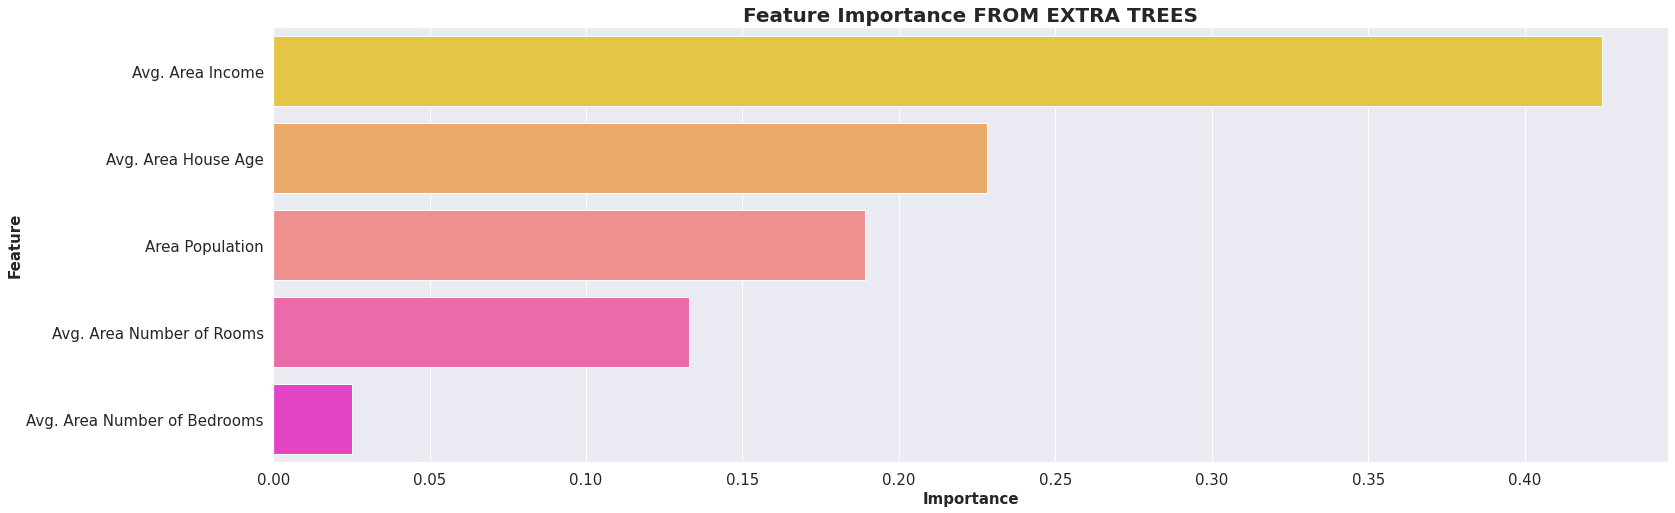

In [ ]:
extra_trees_model = ExtraTreesRegressor() ## EXTRATREES MODEL
extra_trees_model.fit(X,y) ## FIT

## CREATE THE IMPORTANCE DATAFRAME
extratrees_features = pd.DataFrame(extra_trees_model.feature_importances_,
             columns=['Importance'])
extratrees_features['Feature'] = X.columns
extratrees_features = extratrees_features.sort_values('Importance', ascending=False)


## VISUALIZATION OF IMPORTANCE
plt.figure(figsize=(25, 8))
ax = sns.barplot(data=extratrees_features, x='Importance', y='Feature',
                 palette="spring_r")
#ax.bar_label(ax.containers[0]) ## LABELS
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xlabel('Importance',fontsize=15, weight="bold")
ax.set_ylabel('Feature',fontsize=15,weight="bold")
plt.title("Feature Importance FROM EXTRA TREES", size=20, weight="bold")


    
plt.show()

## <font color="Tomato">FINAL DATASET</font>

## Taking The Extra Trees Feature List

In [ ]:
final_feature_list = list(extratrees_features['Feature'])
final_feature_list.append(target)

df = df[final_feature_list[:num_feat]]
df.head()

,Avg. Area Income,Avg. Area House Age,Area Population,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Price
0,79545.458574,5.682861,23086.800503,7.009188,4.09,1.059034e+06
1,79248.642455,6.002900,40173.072174,6.730821,3.09,1.505891e+06
2,61287.067179,5.865890,36882.159400,8.512727,5.13,1.058988e+06
3,63345.240046,7.188236,34310.242831,5.586729,3.26,1.260617e+06
4,59982.197226,5.040555,26354.109472,7.839388,4.23,6.309435e+05


## <font color="Tomato">FINAL CORELATION MATRIX</font>

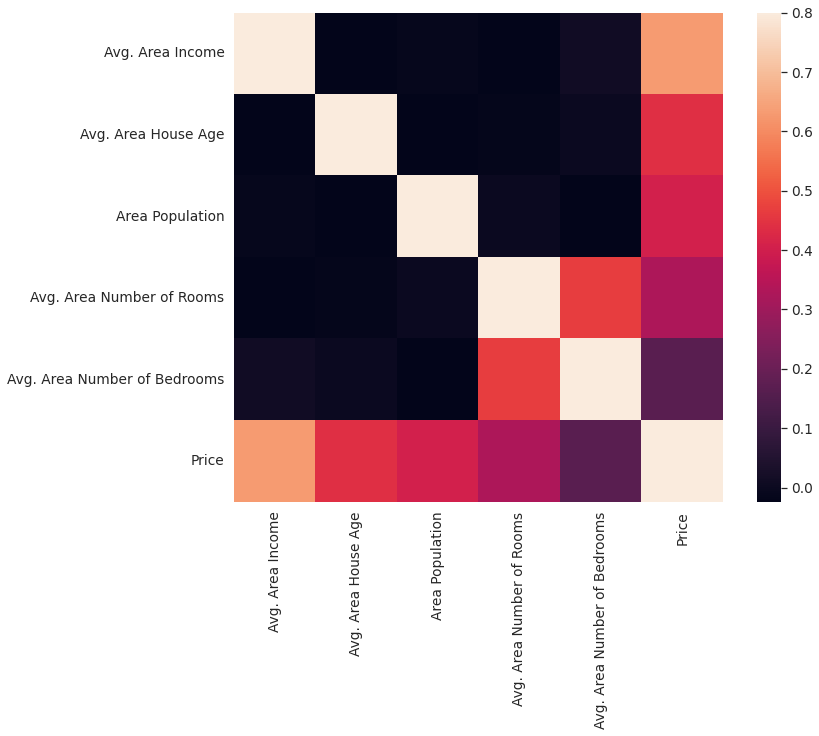

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# <font color="Orange">FINAL DATASET</font>

In [ ]:
X = df[[col for col in df.columns if col!=target]]   ### DATA
y = df[target]                                         ### TARGET
df.head()

,Avg. Area Income,Avg. Area House Age,Area Population,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Price
0,79545.458574,5.682861,23086.800503,7.009188,4.09,1.059034e+06
1,79248.642455,6.002900,40173.072174,6.730821,3.09,1.505891e+06
2,61287.067179,5.865890,36882.159400,8.512727,5.13,1.058988e+06
3,63345.240046,7.188236,34310.242831,5.586729,3.26,1.260617e+06
4,59982.197226,5.040555,26354.109472,7.839388,4.23,6.309435e+05


# <font color="Orange">SUPERVISED MODELS EVALUATION</font>

## <font color="Tomato">SPLIT DATA INTO TRAIN TEST SPLIT</font>
80% Train Set  ---  20% Test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\033[0;30;47m{:60s}:\033[0;37;41m{:d}".format("NUMBER OF ROWS IN TRAIN SET",X_train.shape[0]))
print("\033[0;30;47m{:60s}:\033[0;37;41m{:d}".format("NUMBER OF ROWS IN TEST SET",X_test.shape[0]))

NUMBER OF ROWS IN TRAIN SET                                 :3892
NUMBER OF ROWS IN TEST SET                                  :973


## <font color="Tomato">DATA STANDARDIZATION</font>

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train) ## Training Set

scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test) ## Training Set


## <font color="Tomato">TARGET LOG TRANSFORM</font>

In [ ]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [ ]:
def inv_y(transformed_y):
    return np.exp(transformed_y)

## <font color="Tomato">EVALUATE ALL REGRESSION MODELS WITHOUT GRIDSEARCH</font>

In [ ]:
rng = np.random.RandomState(0)

In [ ]:
def train_model(m,name):
    model = m
    model.fit(X=X_train, y=y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print("\033[1;36;40m {:30s} MAE {:20s} R2 {:20s}".format(name,'%3.3f'%mae,'%3.3f'%r2))

train_model(LinearRegression(),'Linear Regression')
train_model(RandomForestRegressor(),"Random Forest Regressor")   


 Linear Regression              MAE 0.084                R2 0.864               
 Random Forest Regressor        MAE 0.087                R2 0.864               


## <font color="Tomato">EVALUATE ALL REGRESSION MODELS WITH GRIDSEARCH</font>

In [ ]:
models = [('LinearRegression', LinearRegression(),{
                'fit_intercept': [True, False]
            }),
            
            ('RandomForestRegressor',RandomForestRegressor(),{ 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            })
              ]


In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

df_reg = pd.DataFrame(columns=['Name','R2'])
names = []
r2s = []

for i in range(2):
    model = models[i][1]
    parameters = models[i][2]
    name = models[i][0]
    grid = GridSearchCV(model, parameters,cv=5).fit(X_train, y_train)


    model.fit(X=X_train, y=y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print("\033[1;37;40m "+name)
    print("\033[1;31;40m BEST PARAMETERS")
    print(grid.best_params_)

    model = models[i][1].set_params(**grid.best_params_)
    model.fit(X=X_train, y=y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print("\033[1;36;40m {:30s} MAE {:20s} R2 {:20s}".format(name,'%3.3f'%mae,'%3.3f'%r2))
    print()

    names.append(name)
    r2s.append(r2)

df_reg['Name'] = names
df_reg['R2'] = r2s

 LinearRegression
 BEST PARAMETERS
{'fit_intercept': True}
 LinearRegression               MAE 0.084                R2 0.864               

 RandomForestRegressor
 BEST PARAMETERS
{'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 30}
 RandomForestRegressor          MAE 0.088                R2 0.857               



# <font color="Orange">UNSUPERVISED MODELS EVALUATION</font>

## <font color="Tomato">EVALUATE ALL UNSUPERVISED MODELS WITHOUT CLUSTER OPTIMIZATION</font>

In [ ]:
clustering_df = df.copy()
clustering_df.head()

,Avg. Area Income,Avg. Area House Age,Area Population,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Price
0,79545.458574,5.682861,23086.800503,7.009188,4.09,1.059034e+06
1,79248.642455,6.002900,40173.072174,6.730821,3.09,1.505891e+06
2,61287.067179,5.865890,36882.159400,8.512727,5.13,1.058988e+06
3,63345.240046,7.188236,34310.242831,5.586729,3.26,1.260617e+06
4,59982.197226,5.040555,26354.109472,7.839388,4.23,6.309435e+05


In [ ]:
# Standardize the data
scaler = StandardScaler().fit(clustering_df)
clustering_df = scaler.transform(clustering_df)
clustering_df[:5]

array([[ 1.06071779, -0.30363229, -1.35240284,  0.02290907,  0.0859644 ,
        -0.5091504 ],
       [ 1.03191461,  0.02775903,  0.4207993 , -0.25978767, -0.72371729,
         0.80976071],
       [-0.7110857 , -0.11411114,  0.07927052,  1.5498338 ,  0.92803335,
        -0.5092849 ],
       [-0.51135957,  1.25514314, -0.18764131, -1.42167478, -0.5860714 ,
         0.0858278 ],
       [-0.83771093, -0.96872385, -1.01332365,  0.8660213 ,  0.19931983,
        -1.77266937]])

#### <font color="Tomato">KMEANS MODEL WITHOUT CLUSTER OPTIMIZATION</font>

In [ ]:
## K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(clustering_df)
kmeans.labels_

array([1, 0, 1, ..., 0, 1, 0], dtype=int32)

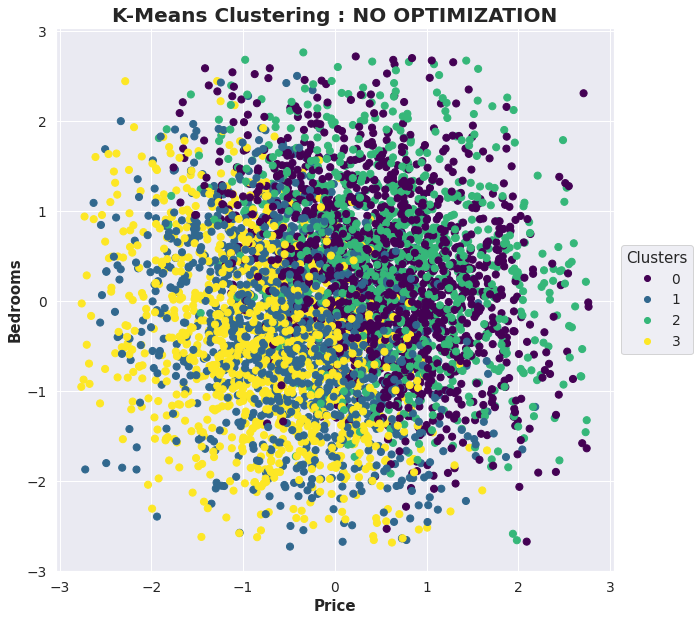

In [ ]:
# plot on 2 dimensions
fig,ax = plt.subplots(figsize=(10,10))
sc = plt.scatter(clustering_df[:,0],clustering_df[:,1],c=kmeans.labels_,s=50,cmap='viridis')
plt.title('K-Means Clustering : NO OPTIMIZATION', size=20, weight="bold")
plt.xlabel('Price', size=15, weight="bold")
plt.ylabel('Bedrooms', size=15, weight="bold")
ax.legend(*sc.legend_elements(), title="Clusters", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

#### <font color="Tomato">AGGLOMERATIVE MODEL WITHOUT CLUSTER OPTIMIZATION</font>

In [ ]:
## AGGLOMERATIVE CLUSTERING
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit(clustering_df)
hc.labels_


array([0, 1, 2, ..., 0, 1, 1])

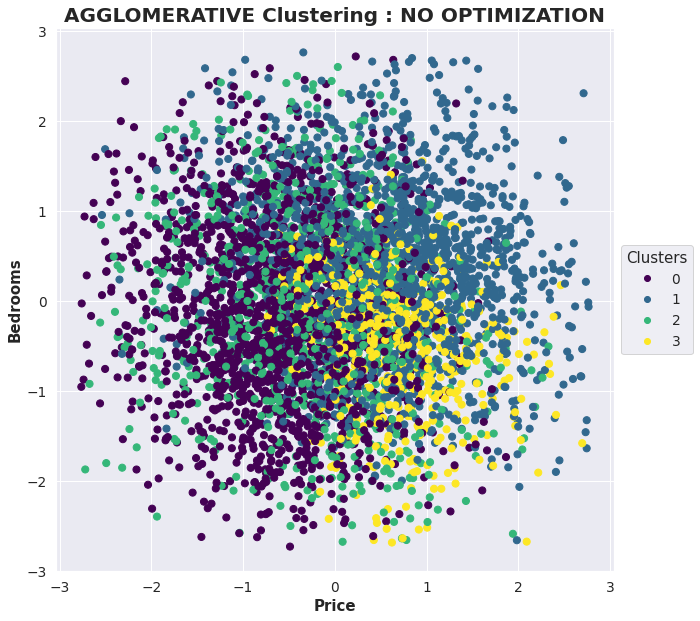

In [ ]:
# plot on 2 dimensions
# plot on 2 dimensions
fig,ax = plt.subplots(figsize=(10,10))
sc = plt.scatter(clustering_df[:,0],clustering_df[:,1],c=hc.labels_,s=50,cmap='viridis')
plt.title('AGGLOMERATIVE Clustering : NO OPTIMIZATION', size=20, weight="bold")
plt.xlabel('Price', size=15, weight="bold")
plt.ylabel('Bedrooms', size=15, weight="bold")
ax.legend(*sc.legend_elements(), title="Clusters", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

## <font color="Tomato">EVALUATE ALL UNSUPERVISED MODELS WITH CLUSTER OPTIMIZATION : PCA</font>

#### <font color="Tomato">PCA : PRINCIPAL COMPONENT ANALLYSIS</font>

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5).fit(clustering_df)
pca_2d = pca.transform(clustering_df)
pca_2d[:5]


array([[-0.30409949,  0.20085076, -0.3577949 , -1.71330054,  0.00789464],
       [ 0.81241719, -1.2004321 ,  0.40019734, -0.38755169,  0.27967823],
       [ 0.14635641,  1.85674213,  0.04428835,  0.5276893 ,  0.37360433],
       [-0.51542156, -1.31959034, -1.22545992,  0.59588106, -0.54091633],
       [-1.74640331,  1.70544146,  0.0676627 , -0.42154243,  0.54037387]])

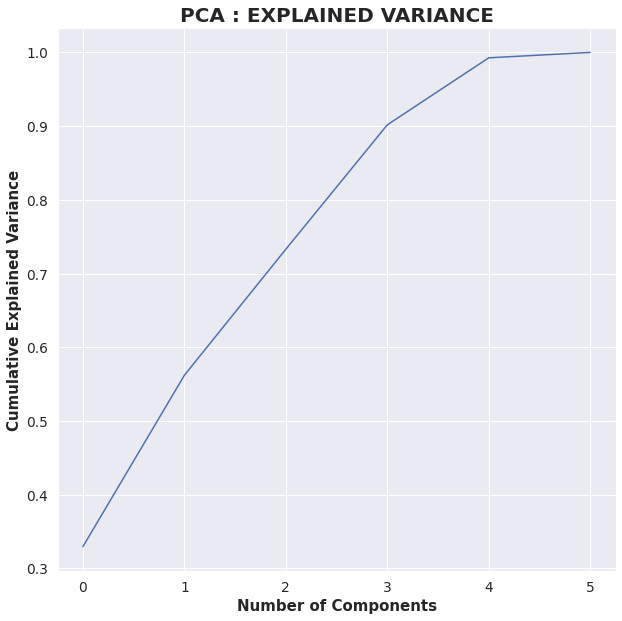

In [ ]:
# find effective number of components
pca = PCA().fit(clustering_df)
plt.figure(figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', size=15, weight="bold")
plt.ylabel('Cumulative Explained Variance', size=15, weight="bold")
plt.title('PCA : EXPLAINED VARIANCE', size=20, weight="bold")
plt.show()

In [ ]:
## Based on exlpained variance, we can choose the number of components to be ?
explained_variance = pca.explained_variance_ratio_
explained_variance_ratio = np.cumsum(explained_variance)
# number of components to keep
num_keep = 0
for i in range(len(explained_variance_ratio)):
    if explained_variance_ratio[i] >= 0.95: # 95% of variance explained
        num_keep = i + 1
        break
print("\033[1;36;40m {:30s} {:20d}".format('Number of Components to Keep',num_keep))

 Number of Components to Keep                      5


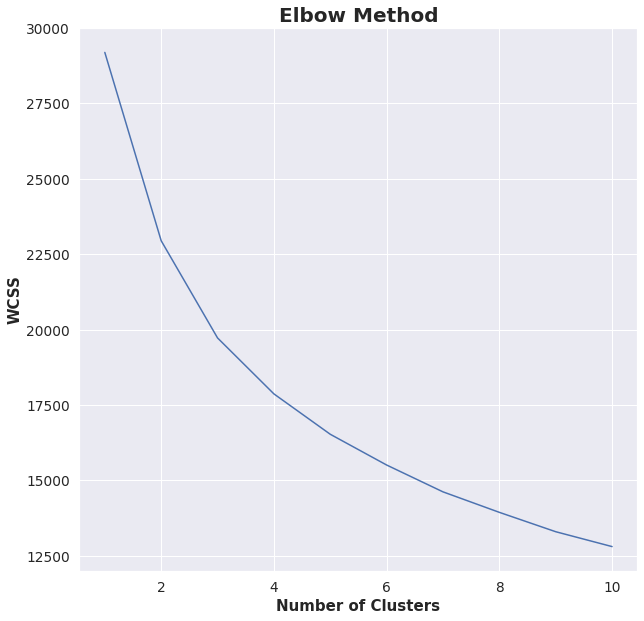

In [ ]:
# Use Elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(clustering_df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 10))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method', size=20, weight="bold")
plt.xlabel('Number of Clusters', size=15, weight="bold")
plt.ylabel('WCSS', size=15, weight="bold")
plt.show()

In [ ]:
# number of optimal clusters
optimal_clusters = 3
print("\033[1;36;40m {:30s} {:20d}".format('Number of Optimal Clusters',optimal_clusters))

 Number of Optimal Clusters                        3


#### <font color="Tomato">KMEANS MODEL WITH CLUSTER OPTIMIZATION</font>

In [ ]:
# K-Means on PCA data
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(pca_2d)
kmeans.labels_


array([0, 1, 2, ..., 1, 2, 1], dtype=int32)

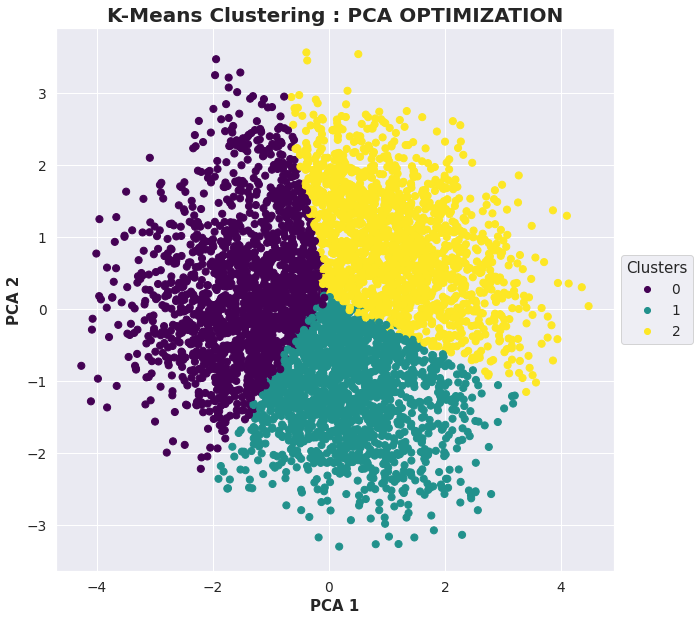

In [ ]:
# plot on 2 dimensions
fig,ax = plt.subplots(figsize=(10, 10))
sc = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('K-Means Clustering : PCA OPTIMIZATION', size=20, weight="bold")
plt.xlabel('PCA 1', size=15, weight="bold")
plt.ylabel('PCA 2', size=15, weight="bold")
ax.legend(*sc.legend_elements(), title="Clusters", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
## Evaluate the model
from sklearn.metrics import silhouette_score
silhouette_avg_kmeans = silhouette_score(pca_2d, kmeans.labels_)
print("\033[1;36;40m {:30s} {:20.2f}".format('Silhouette Score : K-Means',silhouette_avg_kmeans))


 Silhouette Score : K-Means                     0.18


#### <font color="Tomato">AGGLOMERATIVE MODEL WITH CLUSTER OPTIMIZATION</font>

In [ ]:
# Agglomerative Clustering on PCA data
hc = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward').fit(pca_2d)
hc.labels_


array([0, 2, 2, ..., 0, 2, 2])

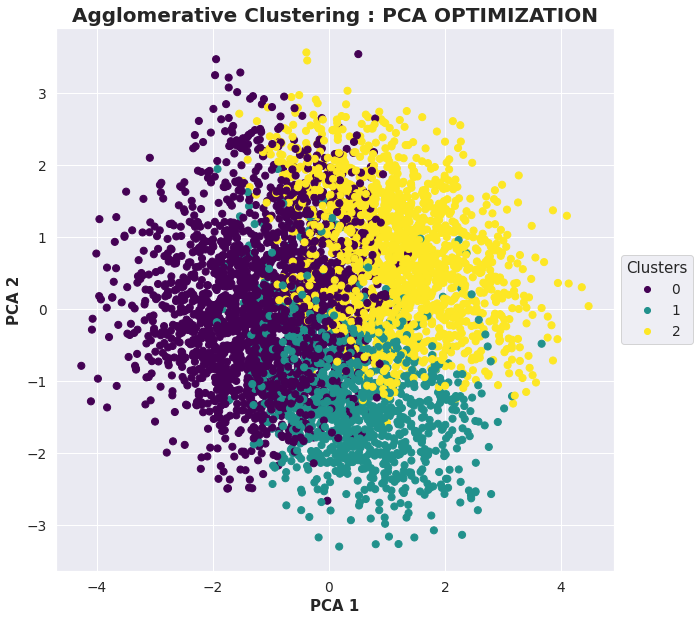

In [ ]:
# plot on 2 dimensions
fig,ax = plt.subplots(figsize=(10, 10))
sc = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=hc.labels_, s=50, cmap='viridis')
plt.title('Agglomerative Clustering : PCA OPTIMIZATION', size=20, weight="bold")
plt.xlabel('PCA 1', size=15, weight="bold")
plt.ylabel('PCA 2', size=15, weight="bold")
ax.legend(*sc.legend_elements(), title="Clusters", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
# Evaluate the model
from sklearn.metrics import silhouette_score
silhouette_avg_hc = silhouette_score(pca_2d, hc.labels_)
print("\033[1;36;40m {:30s} {:20.2f}".format('Silhouette Score : Agglomerative Clustering',silhouette_avg_hc))

 Silhouette Score : Agglomerative Clustering                 0.12


In [ ]:
# Store the results in df_cluster_results
df_cluster_results = pd.DataFrame(columns=['Cluster','Silhouette Score'])
df_cluster_results.loc[0] = ['K-Means',silhouette_avg_kmeans]
df_cluster_results.loc[1] = ['Agglomerative Clustering',silhouette_avg_hc]
df_cluster_results

,Cluster,Silhouette Score
0,K-Means,0.175953
1,Agglomerative Clustering,0.121664


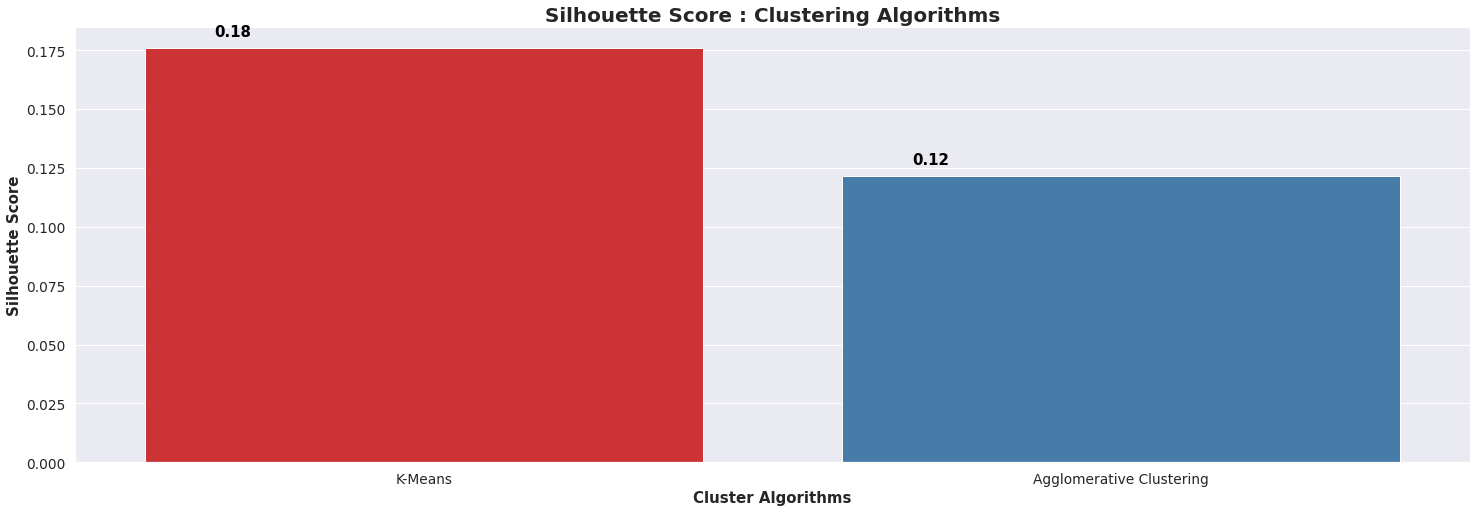

In [ ]:
## VISUALIZATION OF EVALUATION
plt.figure(figsize=(25, 8))
ax = sns.barplot(data=df_cluster_results, x='Cluster', y='Silhouette Score', palette='Set1')
plt.title('Silhouette Score : Clustering Algorithms', size=20, weight="bold")
plt.xlabel('Cluster Algorithms', size=15, weight="bold")
plt.ylabel('Silhouette Score', size=15, weight="bold")
# put the score on the bars
for i in ax.patches:
    ax.text(i.get_x() + 0.1, i.get_height() + 0.005, \
            str(round(i.get_height(), 2)), fontsize=15, color='black', fontweight='bold')
plt.show()